# Cuaderno: Ridge y Lasso Regression en Profundidad

## **1. Introducción al problema de la regresión y la regularización**
En los problemas de **regresión**, nuestro objetivo es encontrar una relación entre una variable dependiente (respuesta) y una o más variables independientes (predictores).
La forma más común de hacerlo es utilizando **regresión lineal**. Sin embargo, la regresión lineal tiene limitaciones, especialmente cuando se enfrenta a datos ruidosos, multicolinealidad
(cuando las variables independientes están correlacionadas entre sí) o un gran número de variables con relación al número de observaciones. Aquí es donde entra la **regularización**.

La regularización es una técnica que modifica la función de costo del modelo de regresión lineal, agregando una penalización por el tamaño de los coeficientes del modelo.
Esto ayuda a reducir el sobreajuste (cuando el modelo se ajusta demasiado a los datos de entrenamiento, pero no generaliza bien a datos nuevos) y mejora la capacidad predictiva del modelo.--


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
    


### 2. **Generar un conjunto de datos**
Vamos a crear un conjunto de datos sintético con variables altamente correlacionadas para demostrar los beneficios de la regularización.
    

In [3]:

# Generar datos sintéticos
np.random.seed(42)
n_samples = 100
n_features = 10

# Crear variables independientes
X = np.random.randn(n_samples, n_features)

# Crear un vector de coeficientes con solo algunas variables no cero
true_coefs = np.array([5, -3, 0, 0, 2, 0, 0, 1, 0, 0])
y = X @ true_coefs + np.random.randn(n_samples) * 0.5  # Añadir algo de ruido

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

In [5]:
X_train.shape

(80, 10)


### 3. **Normalizar los datos**
Es importante normalizar los datos antes de aplicar Ridge o Lasso, ya que ambas técnicas son sensibles a la escala de las variables.
    

In [6]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    


## **4. Ridge Regression**
La regresión Ridge añade una penalización sobre la magnitud de los coeficientes al modelo de regresión lineal para limitar el tamaño de estos y evitar el sobreajuste.
    

In [7]:

# Ajustar un modelo de Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Predicciones y evaluación
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge - MSE: {mse_ridge:.3f}, R2: {r2_ridge:.3f}')
print(f'Coeficientes de Ridge: {ridge_model.coef_}')
    

Ridge - MSE: 0.290, R2: 0.990
Coeficientes de Ridge: [ 4.39435056 -3.19101082  0.00590557  0.02457696  2.06077281  0.022648
 -0.11026121  0.92545418  0.03292146  0.0148021 ]


## **5. Lasso Regression**
La regresión Lasso agrega una penalización proporcional a la suma de los valores absolutos de los coeficientes, lo que puede llevar a coeficientes exactamente cero y, por ende, a la selección de variables.
    

In [8]:

# Ajustar un modelo de Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

# Predicciones y evaluación
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso - MSE: {mse_lasso:.3f}, R2: {r2_lasso:.3f}')
print(f'Coeficientes de Lasso: {lasso_model.coef_}')
    

Lasso - MSE: 0.261, R2: 0.991
Coeficientes de Lasso: [ 4.36966552 -3.11917961 -0.          0.          1.99126826  0.
 -0.          0.83367342  0.          0.        ]



### **6. Visualización de los coeficientes**
Visualizaremos los coeficientes estimados por cada modelo para observar cómo afectan la regularización y la selección de variables.
    

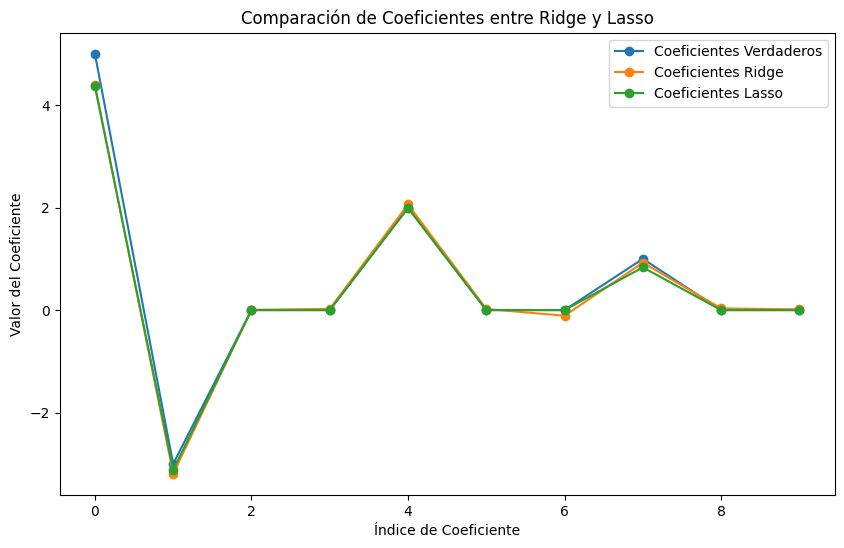

In [9]:

plt.figure(figsize=(10, 6))
plt.plot(true_coefs, 'o-', label='Coeficientes Verdaderos')
plt.plot(ridge_model.coef_, 'o-', label='Coeficientes Ridge')
plt.plot(lasso_model.coef_, 'o-', label='Coeficientes Lasso')
plt.xlabel('Índice de Coeficiente')
plt.ylabel('Valor del Coeficiente')
plt.title('Comparación de Coeficientes entre Ridge y Lasso')
plt.legend()
plt.show()
    


## **7. Ajuste de hiperparámetros $\alpha$ mediante validación cruzada**
Una técnica común para seleccionar el mejor valor de $\alpha$ es usar **validación cruzada**.
    

In [10]:

# Ajustar Ridge con validación cruzada
ridge_cv_model = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridge_cv_model.fit(X_train_scaled, y_train)

# Ajustar Lasso con validación cruzada
lasso_cv_model = LassoCV(alphas=[0.01, 0.1, 1.0])
lasso_cv_model.fit(X_train_scaled, y_train)

print(f'Mejor alpha para Ridge: {ridge_cv_model.alpha_}')
print(f'Mejor alpha para Lasso: {lasso_cv_model.alpha_}')
    

Mejor alpha para Ridge: 0.1
Mejor alpha para Lasso: 0.01



### **8. Efecto de $\alpha$ en el modelo**
Visualicemos el efecto de diferentes valores de $\alpha$ en el error cuadrático medio (MSE) y los coeficientes de Lasso.
    

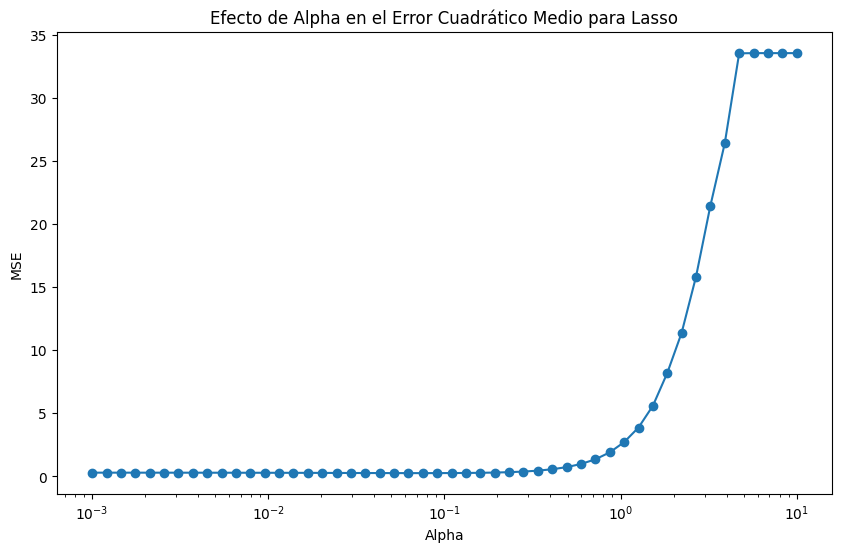

In [11]:

alphas = np.logspace(-3, 1, 50)
mse_lasso_path = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_test_scaled)
    mse_lasso_path.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_lasso_path, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Efecto de Alpha en el Error Cuadrático Medio para Lasso')
plt.show()
    


## **9. Conclusiones finales**
- **Ridge Regression** es útil para reducir la magnitud de los coeficientes y es adecuado cuando hay multicolinealidad.
- **Lasso Regression** realiza selección de variables y es útil para modelos más interpretativos.
- La selección del mejor $\alpha$ mediante validación cruzada es esencial para el rendimiento óptimo del modelo.
    